# Image Segmentation

In [1]:
IMAGE = '../data/original_images/41.tif'

In [2]:
import sys
sys.path.append("../")

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from counter.segmentation.fcm import FCM

Text(0.5, 1.0, 'Original Image')

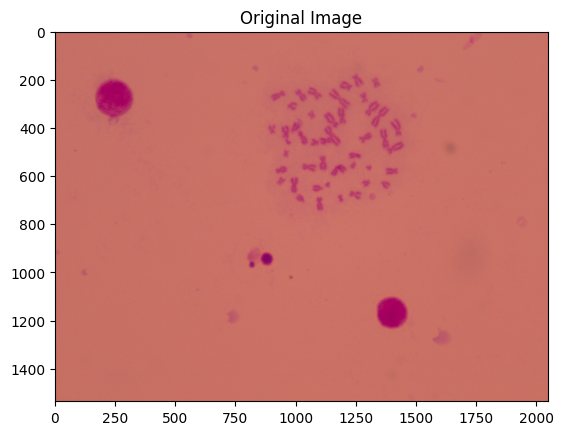

In [3]:
original_image: np.ndarray = cv.imread(IMAGE)
plt.imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')

## K-means

In [4]:
image: np.ndarray = cv.imread(IMAGE)
image: np.ndarray = cv.cvtColor(image, cv.COLOR_BGR2RGB)
reshaped = image.reshape((-1, 3))
reshaped = np.float32(reshaped)

In [5]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.85)
k = 3
retval, labels, centers = cv.kmeans(reshaped, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

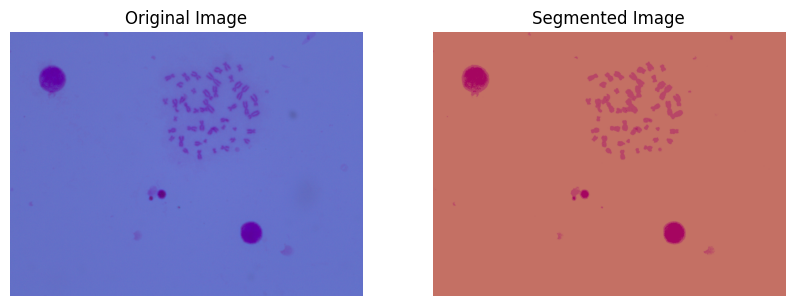

In [6]:
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape((image.shape))
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.ravel()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[0].set_axis_off()
axes[1].imshow(segmented_image)
axes[1].set_title('Segmented Image')
axes[1].set_axis_off()

# Mean-Shift

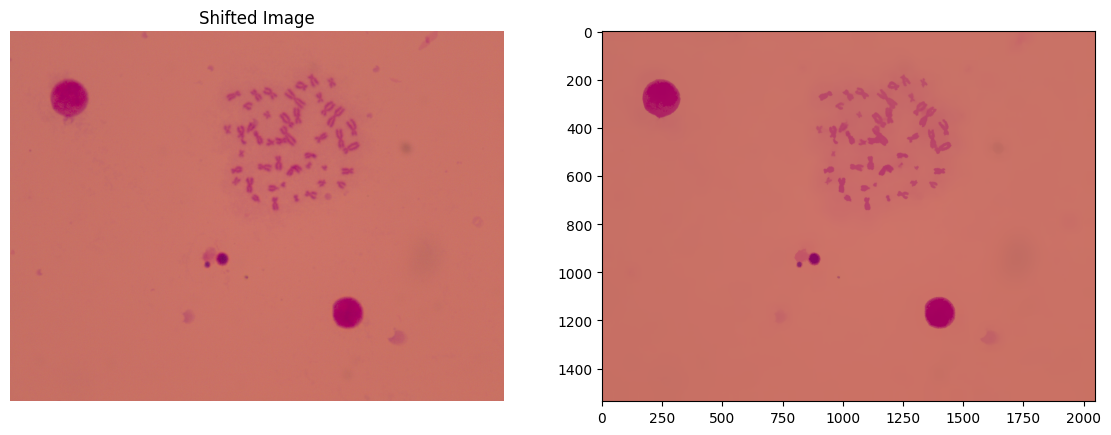

In [7]:
image: np.ndarray = cv.imread(IMAGE)
shifted = cv.pyrMeanShiftFiltering(src=image, sp=30, sr=20)
fig, axes = plt.subplots(1, 2, figsize=(14, 8))
axes = axes.ravel()
axes[0].imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].set_axis_off()
axes[1].imshow(cv.cvtColor(shifted, cv.COLOR_BGR2RGB))
axes[0].set_title('Shifted Image')
axes[0].set_axis_off()

### Fuzzy C-Means

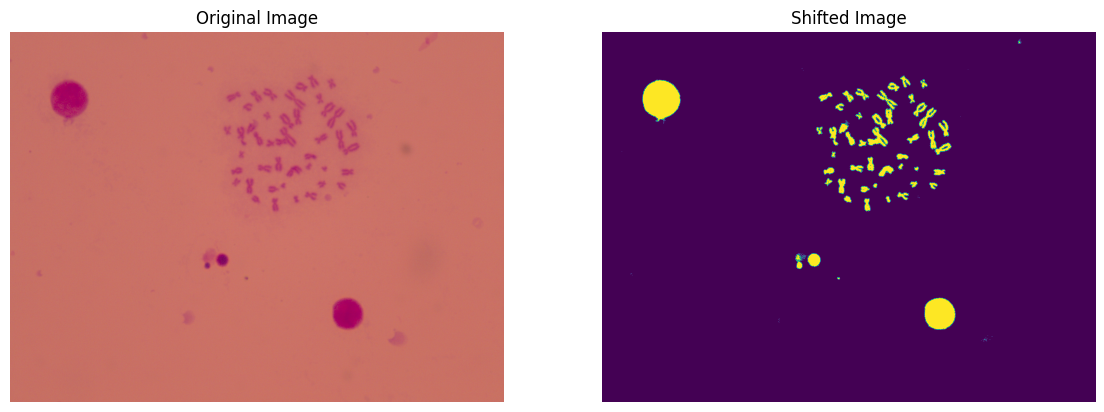

In [8]:
image: np.ndarray = cv.imread(IMAGE, cv.IMREAD_GRAYSCALE)
fcm = FCM(image, n_clusters=2, m=2, epsilon=2, max_iter=100)
result = fcm.form_clusters()
fig, axes = plt.subplots(1, 2, figsize=(14, 8))
axes = axes.ravel()
axes[0].imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].set_axis_off()
axes[1].imshow(result)
axes[1].set_title('Shifted Image')
axes[1].set_axis_off()

In [10]:
result.shape

(1536, 2048)

In [41]:
import skfuzzy as fuzz

image: np.ndarray = cv.imread(IMAGE)
data = image.reshape((-1, 3))
c = 5  # Number of clusters
m = 2  # Fuzziness coefficient
max_iter = 100  # Maximum number of iterations
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data.T, c, m, error=0.005, maxiter=max_iter, init=None)
cluster_membership = np.argmax(u, axis=0)

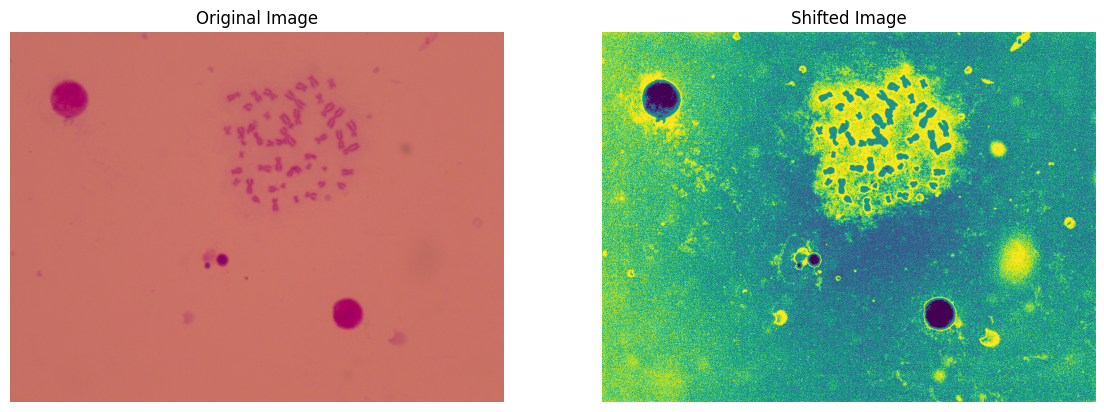

In [44]:
segmented_image = cluster_membership.reshape((image.shape[0], image.shape[1]))

fig, axes = plt.subplots(1, 2, figsize=(14, 8))
axes = axes.ravel()
axes[0].imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].set_axis_off()
axes[1].imshow(segmented_image, cmap='viridis')
axes[1].set_title('Shifted Image')
axes[1].set_axis_off()